# Classification Algorithms

In our previous notebook, we have seen the `LogisticRegression` approach and played around with the `KNeighborsClassifier` method. There are many more classification algorithms within `scikit-learn`. We are going to go over a selection of them, however, using the other ones are relatively easy once we get more experience. Furthermore, we will get back to tree-based ensembles later on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC, LinearSVC

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Once we pick a method:
1. Initialize the hyperparameters or the hyperparameter search space. There are hyperparameters to almost every algorithm/model. You learned these in the Introduction to Machine Learning class
2. Train (model.fit(X,y) or cross_validation_method.fit(X,y)
3. Evaluate (score(ytest, ytest_pred) or model.score(Xtest, ytest))

**Question:** What are the hyperparameters of the imported methods?

Let's do a qucik start with the iris dataset.

LogisticRegression: 0.9666666666666667
MultinomialNB: 0.9333333333333333
GaussianNB: 0.95
DecisionTreeClassifier: 0.95
KNeighborsClassifier: 0.9666666666666667
RandomForestClassifier: 0.9666666666666667
LinearSVC: 0.9833333333333333
SVC: 0.95
MLPClassifier: 0.9666666666666667
GradientBoostingClassifier: 0.95


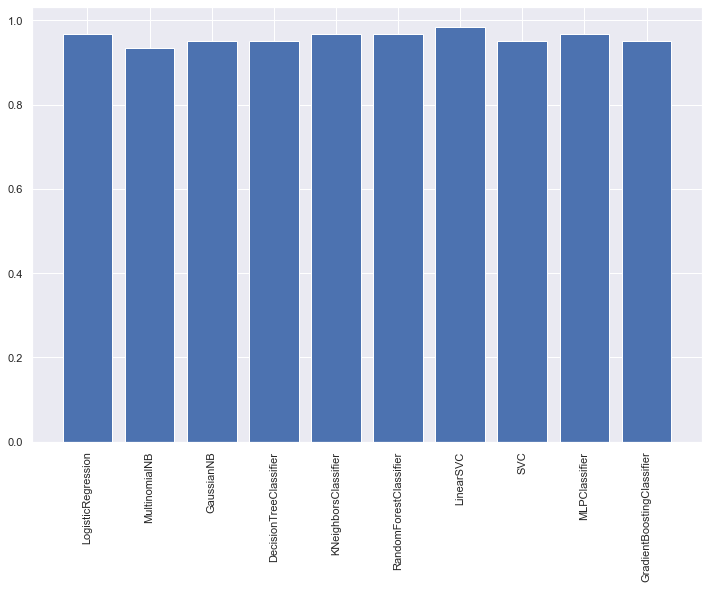

In [3]:
import time
seed = int(time.time())

def quickTest(X, y, clf):
    # So that each algorithm is faced with the same split
    np.random.seed(seed)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    stratify = y)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    print(type(clf).__name__ + ":", accuracy_score(ytest, ypred))
    return type(clf).__name__, accuracy_score(ytest, ypred)

iris_data = datasets.load_iris()
X = iris_data["data"]
y = iris_data["target"]

names = [""] * 10
accuracies = [0] * 10

names[0], accuracies[0] = quickTest(X, y, LogisticRegression(max_iter = 1000)) #C = 1.0

names[1], accuracies[1] = quickTest(X, y, MultinomialNB()) #alpha = 1.0

names[2], accuracies[2] = quickTest(X, y, GaussianNB()) 

names[3], accuracies[3] = quickTest(X, y, DecisionTreeClassifier(max_depth = 3))
# max_depth, max_leaf_nodes, max_features, min_impurity_decrease, min_samples_split, min_samples_leaf   

names[4], accuracies[4] = quickTest(X, y, KNeighborsClassifier(n_neighbors = 3)) # n_neighbors = 3

names[5], accuracies[5] = quickTest(X, y, RandomForestClassifier(n_estimators = 5, max_depth = 3))
# n_estimators + other tree parameters. this classifier is pretty robust especially as we increase n_estimators

names[6], accuracies[6] = quickTest(X, y, LinearSVC(max_iter = 10000)) #C = 1.0 

names[7], accuracies[7] = quickTest(X, y, SVC(gamma = "auto")) 
# kernel, degree, gamma, coef0 (for the kernels), C = 1.0

names[8], accuracies[8] = quickTest(X, y, MLPClassifier(hidden_layer_sizes = (20,),
                                                        max_iter = 10000))
# architecture parameters

names[9], accuracies[9] = quickTest(X, y, GradientBoostingClassifier(n_estimators = 5, max_depth = 3, learning_rate=0.2))
# n_estimators + gradient descent + other tree parameters. 

plt.figure(figsize = (12, 8))
plt.bar(list(range(len(accuracies))), accuracies)
plt.xticks(list(range(len(accuracies))), names, rotation = "vertical")
plt.show()

In [4]:
a = (4)
b = (4,)
print(type(a), type(b))

<class 'int'> <class 'tuple'>


### Based on Class Discussion

From `scikit-learn` logistic regression [documentation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (screenshot taken on 28.02.2022 at 19:35):

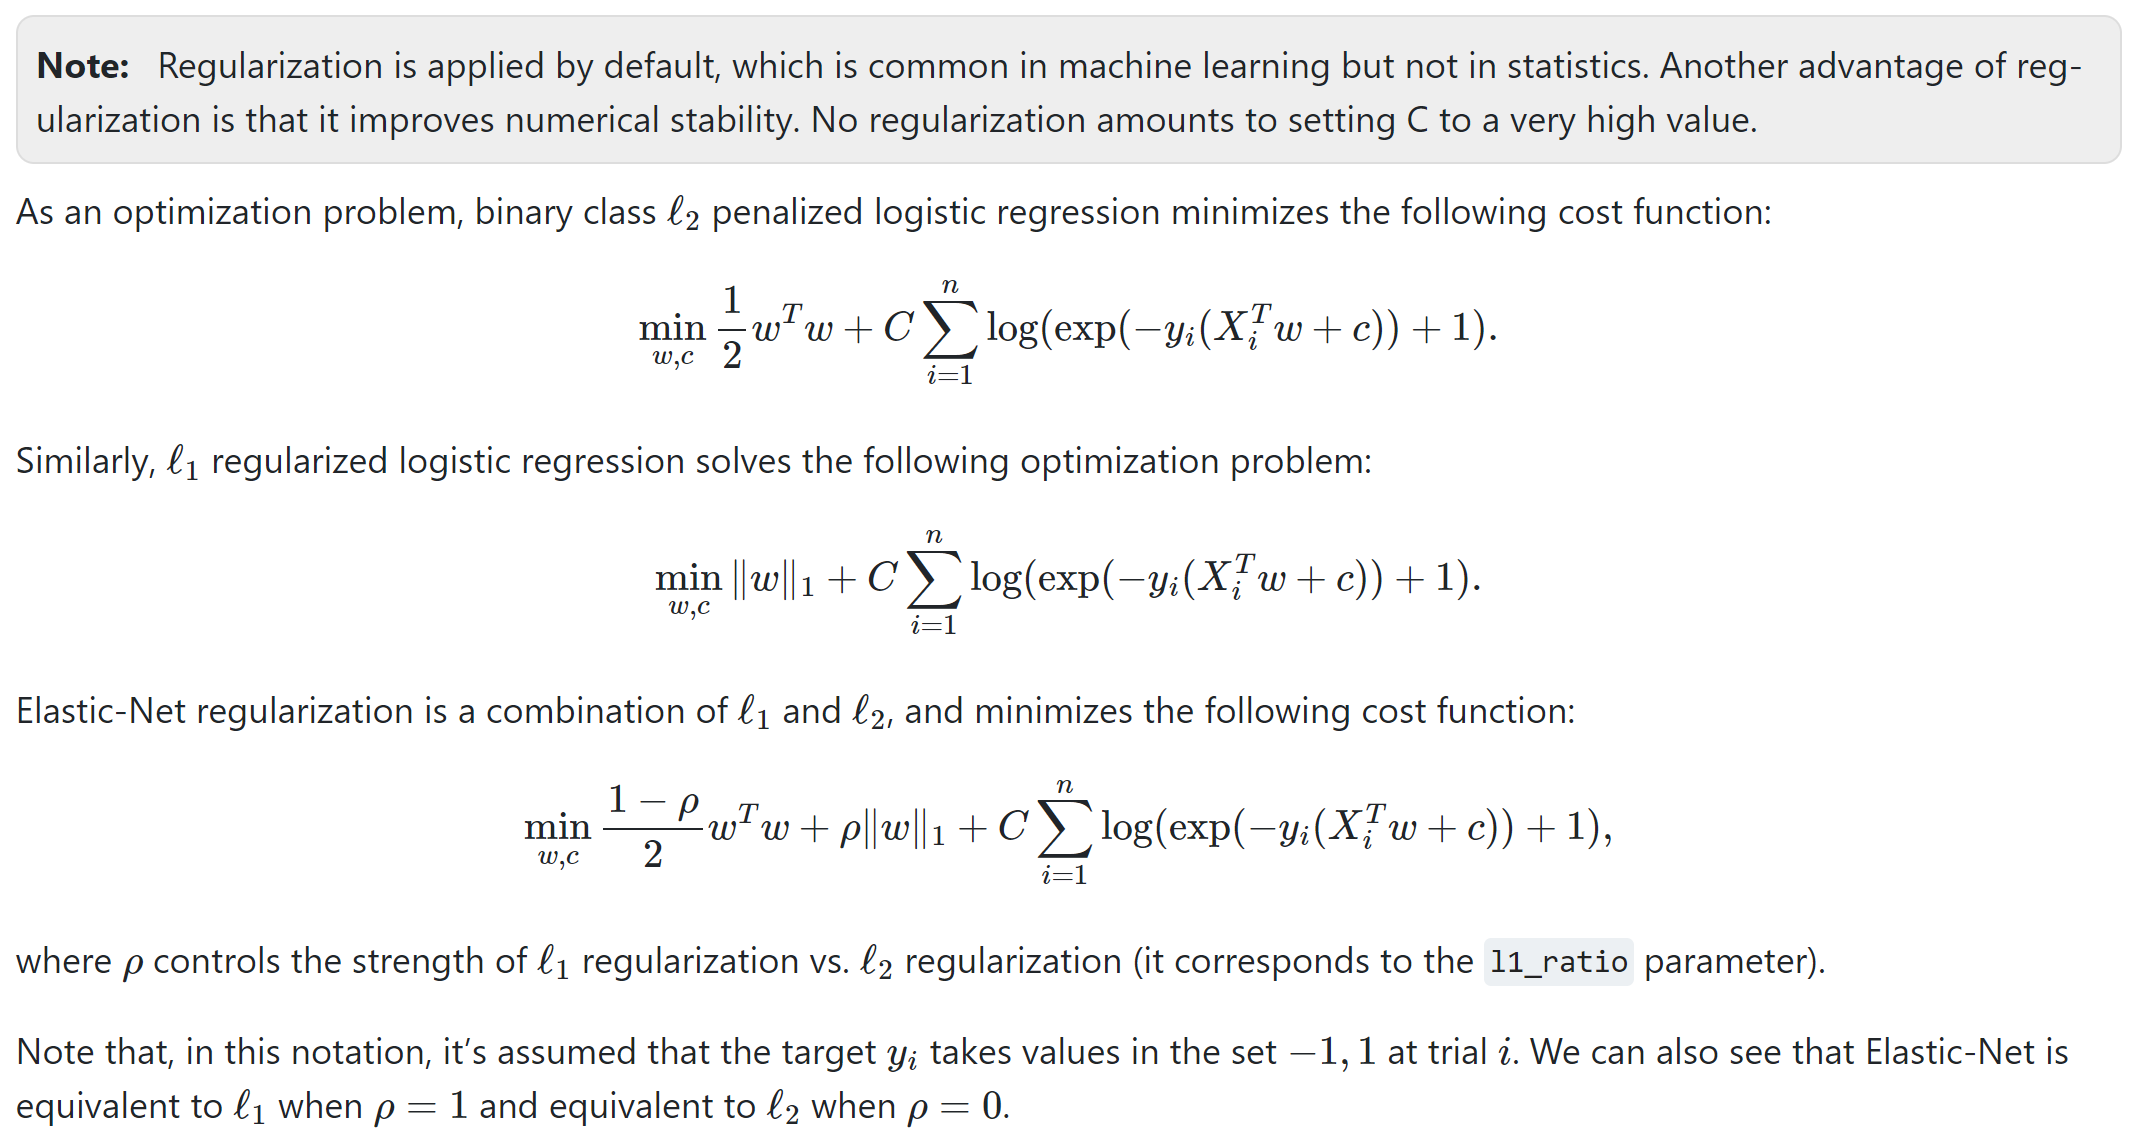


**Notes:**
* The regularization parameter is multiplying the target loss and not the weight norm. Literature usually depicts this the other way but it achieves the same results.
* Setting `penalty = None` when initializing the model achieves no regularization. Use this instead of setting a high `C` calue if you do not want regularization.
* There are multiple solvers and not all solvers support all loss functions.

[SVM version](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)

## Hand-Written Digits

Let's look at a slightly more interesting dataset.

In [5]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

This dataset has 1797 gray-scale images of digits with 8x8 spatial resolution and pixel values between 0 and 16 (both inclusive). For a more involved hand-written digit dataset, look for "MNIST Database". 

In [6]:
print(digits.images.shape)
print(digits.images.min(),digits.images.max())

(1797, 8, 8)
0.0 16.0


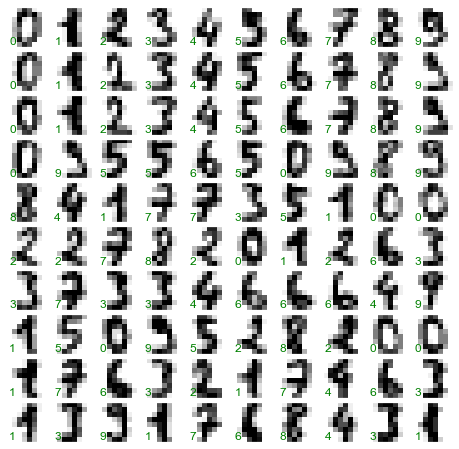

In [7]:
# There are 10 digits, between 0 and 9. Let's plot a subset
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw = {"xticks": [], "yticks": []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = "binary", interpolation = "nearest")
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform = ax.transAxes, color = "green")

Each image is 8x8 and the total dataset (i.e. X) is 1797x8x8 which makes is 3D. However, `scikit-learn` API's want 2D inputs. The easiest way is to map the 8x8 images to 64 vectors. The dataset already has this!

In [8]:
X = digits["data"]
y = digits["target"]

print(X.shape, y.shape)

(1797, 64) (1797,)


Let's start with a linear SVM and a kernel SVM. The parameter `C` is the regularization strength for both. Kernel SVM has other important hyperparameters as well for example depending on the kernel type (and the kernel itself).

In [9]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, 
                                                stratify = y)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

ksvmParams = {"C": [0.001, 0.01, 0.1, 1, 10, 25],   #6
              "kernel": ["poly", "rbf", "linear"],  #3
              "gamma": ["scale","auto"],            #2
              "degree": [1, 2, 3, 4, 5]}            #5

ksvc = RandomizedSearchCV(SVC(gamma = "scale"), ksvmParams, 
                          cv = cv, n_iter = 50, return_train_score = True)
ksvc.fit(Xtrain, ytrain)
ypred = ksvc.predict(Xtest)

print("Kernel:", ksvc.best_estimator_.kernel)
print("C:", ksvc.best_estimator_.C)
print("Accuracy:", accuracy_score(ytest, ypred))

Kernel: rbf
C: 25
Accuracy: 0.9930458970792768


**Limitation:** There is no conditional hyperparameter selection (e.g. only use gamma if the kernel is not linear)

There are other libraries that do this however, e.g. hyperopt

In [10]:
ksvc.cv_results_

{'mean_fit_time': array([0.04524708, 0.06053658, 0.01849151, 0.06821012, 0.0115778 ,
        0.0121675 , 0.01196046, 0.0119679 , 0.01098371, 0.06041584,
        0.06779385, 0.01137404, 0.01218057, 0.06063018, 0.01656408,
        0.01097074, 0.01096854, 0.03968897, 0.0433804 , 0.06885247,
        0.06015863, 0.01057324, 0.01157098, 0.0173564 , 0.01156883,
        0.06921482, 0.03870897, 0.01076741, 0.06929278, 0.0182137 ,
        0.06036263, 0.01177478, 0.01216807, 0.06024585, 0.01078691,
        0.01275396, 0.0125546 , 0.01856503, 0.01095905, 0.01197534,
        0.01087832, 0.01376991, 0.01156244, 0.01097798, 0.0700038 ,
        0.01337004, 0.01217732, 0.06283364, 0.01276693, 0.0115819 ]),
 'std_fit_time': array([8.76121486e-04, 2.23166295e-03, 8.80772380e-04, 1.21082485e-03,
        4.82358471e-04, 3.99488793e-04, 6.18044705e-04, 2.12639434e-05,
        1.09991982e-03, 1.80707285e-03, 6.80303057e-04, 7.89913638e-04,
        9.89037284e-04, 1.71722878e-03, 4.79711202e-04, 6.30601062e-0

Let's visualiaze the scores

In [11]:
def plotTrainValScore(fittedCV, paramName, title, num_iters, use_logs = False):
    trains = np.zeros(shape = num_iters)
    tests = np.zeros(shape = num_iters)
    for i in range(4):
        name = "split" + str(i)
        trains += fittedCV.cv_results_[name + "_train_score"]
        tests += fittedCV.cv_results_[name + "_test_score"]
    
    xaxis = fittedCV.cv_results_["param_" + paramName] #list(range(1,21,2))
    inds = sorted(range(len(xaxis)), key = lambda k: xaxis[k])
    xaxis = sorted(xaxis)
    trains = trains[inds]
    tests = tests[inds]
    
    if use_logs:
        plt.plot(np.log(xaxis), trains / 4)
        plt.plot(np.log(xaxis), tests / 4, "r")
        plt.xticks(np.log(xaxis), [str(round(float(tick), 1)) 
                          for tick in xaxis if tick != ""])
    else:
        plt.plot(xaxis, trains / 4)
        plt.plot(xaxis, tests / 4, "r")
        try:
            plt.xticks(xaxis, [str(round(float(tick), 1)) 
                              for tick in xaxis if tick != ""])
        except:
            pass
    
    plt.legend(["train", "validation"])
    plt.title(title)
    
    plt.show()

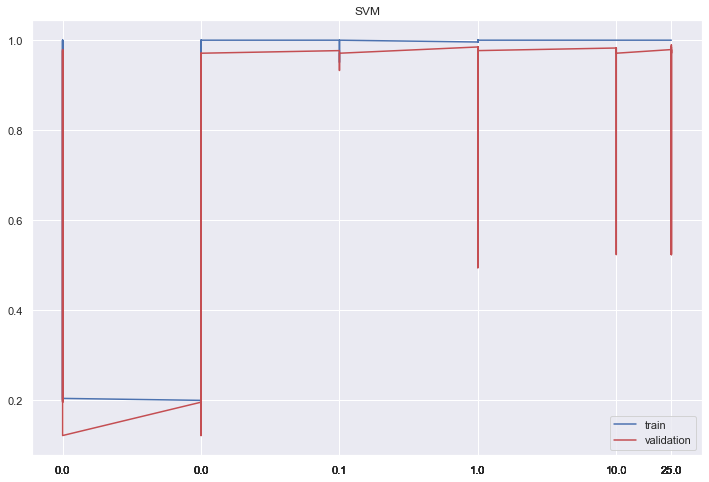

In [12]:
plt.figure(figsize = (12, 8))
plotTrainValScore(ksvc, "C", "SVM", ksvc.n_iter, True)

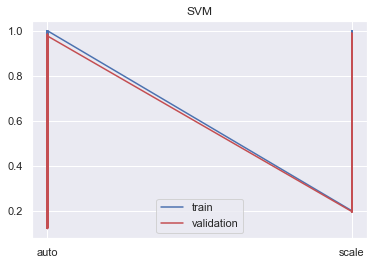

In [13]:
plotTrainValScore(ksvc, "gamma", "SVM", ksvc.n_iter)

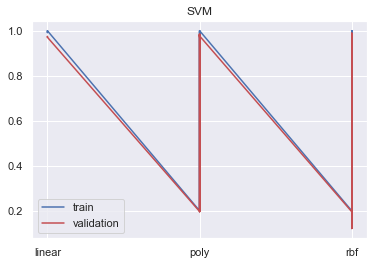

In [14]:
plotTrainValScore(ksvc, "kernel", "SVM", ksvc.n_iter)

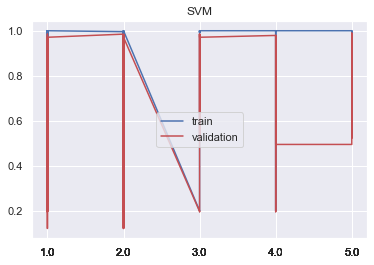

In [15]:
plotTrainValScore(ksvc, "degree", "SVM", ksvc.n_iter)

Something is not right or it is curious. What should we do to further investigate?

In [16]:
inds =(np.arange(len(ksvc.cv_results_["mean_test_score"])))[ksvc.cv_results_["mean_test_score"] < 0.25]

for i in inds:
    print(ksvc.cv_results_["params"][i])

{'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'C': 0.001}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'auto', 'degree': 1, 'C': 0.01}
{'kernel': 'poly', 'gamma': 'scale', 'degree': 1, 'C': 0.001}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 0.001}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 0.001}


In [17]:
inds =(np.arange(len(ksvc.cv_results_["mean_train_score"])))[ksvc.cv_results_["mean_train_score"] < 0.25]

for i in inds:
    print(ksvc.cv_results_["params"][i])

{'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'C': 0.001}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'auto', 'degree': 1, 'C': 0.01}
{'kernel': 'poly', 'gamma': 'scale', 'degree': 1, 'C': 0.001}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 0.001}
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 0.01}
{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 0.001}


In [18]:
#Let's change the C selection and try again
cv = StratifiedKFold(n_splits = 5, shuffle = True)

ksvmParams = {"C": [5, 7, 10, 12, 15],   #5 (we tried 1,10,15,25 before this)
              "kernel": ["poly", "rbf", "linear"],  #3
              "gamma": ["scale","auto"],            #2
              "degree": [1, 2, 3, 4, 5]}            #5

ksvc = RandomizedSearchCV(SVC(gamma = "scale"), ksvmParams, 
                          cv = cv, n_iter = 50, return_train_score = True)
ksvc.fit(Xtrain, ytrain)
ypred = ksvc.predict(Xtest)

print("Kernel:", ksvc.best_estimator_.kernel)
print("C:", ksvc.best_estimator_.C)
print("Accuracy:", accuracy_score(ytest, ypred))

Kernel: rbf
C: 7
Accuracy: 0.9930458970792768


Since these are images, it is easy to visually analyze the results. Let's take a look at a subset. We expect good performance since the winning method had pretty high accuracy (despite some irregularities in CV)

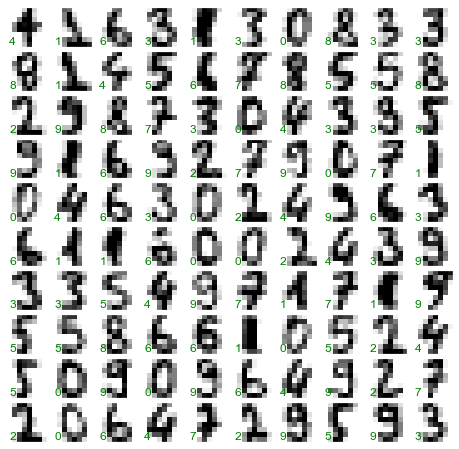

In [19]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw = {"xticks": [], "yticks": []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap = "binary", interpolation = "nearest")
    ax.text(0.05, 0.05, str(ypred[i]),
            transform = ax.transAxes,
            color = "green" if (ytest[i] == ypred[i]) else "red")

In [20]:
# print(ypred[80], ytest[80])

Let's look at the confusion matrix

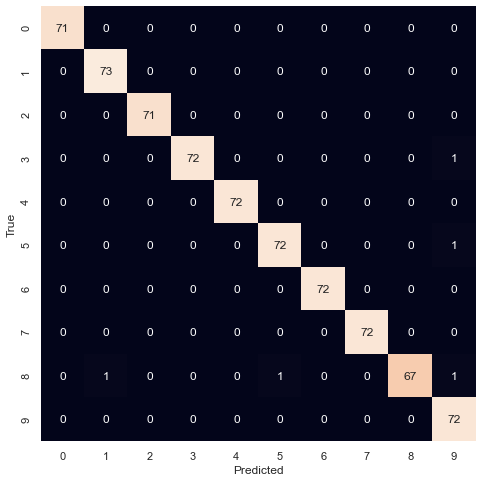

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
plt.figure(figsize = (12, 8))
sns.heatmap(mat, square = True, annot = True, fmt = "d", cbar = False,
            xticklabels = digits["target_names"], yticklabels = digits["target_names"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Let's add MLP, GaussianNB and Decision Tree to the mix:

Hidden Layer Size: (30,)
MLP Accuracy: 0.9624478442280946


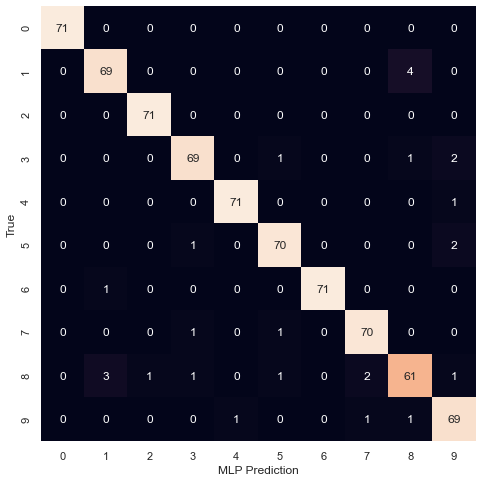

In [22]:
paramsToTestMLP = {"hidden_layer_sizes": [(30,), (10,), (5,), (20, 10)]}
mlp = GridSearchCV(MLPClassifier(max_iter = 10000), paramsToTestMLP, cv = cv)
mlp.fit(Xtrain, ytrain)

ypred = mlp.predict(Xtest)

print("Hidden Layer Size:", mlp.best_estimator_.hidden_layer_sizes)
print("MLP Accuracy:", accuracy_score(ytest, ypred))

mat = confusion_matrix(ytest, ypred)
plt.figure(figsize = (12, 8))
sns.heatmap(mat, square = True, annot = True, fmt = "d", cbar = False,
            xticklabels = digits["target_names"], yticklabels = digits["target_names"])
plt.xlabel("MLP Prediction")
plt.ylabel("True")
plt.show()

GaussianNB Training Accuracy: 0.9285714285714286
GaussianNB Test Accuracy: 0.9276773296244785


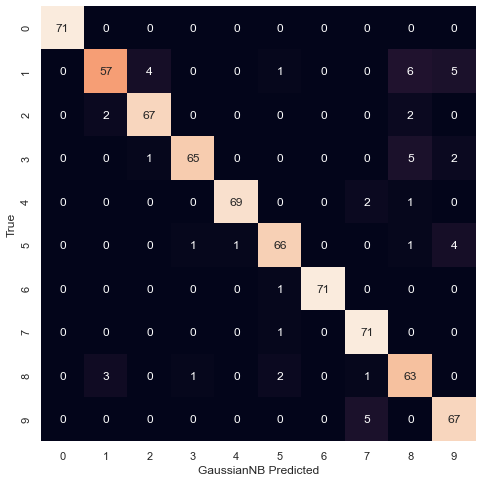

In [23]:
gmb = GaussianNB(var_smoothing=1e-2) #try with 1e-9

gmb.fit(Xtrain, ytrain)
ypred = gmb.predict(Xtest)
print("GaussianNB Training Accuracy:", gmb.score(Xtrain, ytrain))
print("GaussianNB Test Accuracy:", accuracy_score(ytest, ypred))

mat = confusion_matrix(ytest, ypred)
plt.figure(figsize = (12, 8))
sns.heatmap(mat, square = True, annot = True, fmt = "d", cbar = False,
            xticklabels = digits["target_names"], yticklabels = digits["target_names"])
plt.xlabel("GaussianNB Predicted")
plt.ylabel("True")
plt.show()

Let's look at a subset of the data with a less accurate model

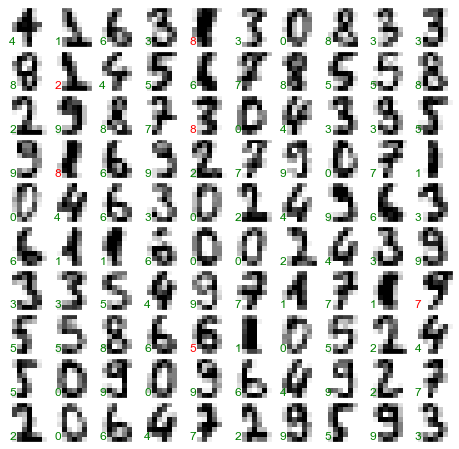

In [24]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw = {"xticks": [], "yticks": []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap = "binary", interpolation = "nearest")
    ax.text(0.05, 0.05, str(ypred[i]),
            transform = ax.transAxes,
            color = "green" if (ytest[i] == ypred[i]) else "red")

Picked Params: None 9 2 gini
Decision Tree Accuracy: 0.7927677329624478


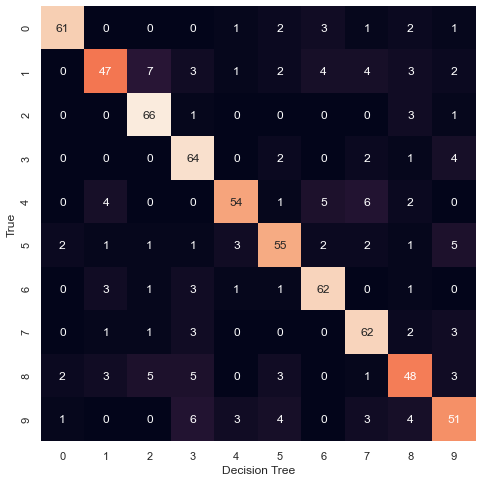

In [25]:
from scipy.stats import randint as sp_randint

dtParams = {"max_depth": [5, None], #None option choses the depths based on leaves
            "max_features": sp_randint(1, 11),
            "min_samples_split": sp_randint(2, 11),
            "criterion": ["gini", "entropy"]}

dt = RandomizedSearchCV(DecisionTreeClassifier(), dtParams, 
                        cv = cv, n_iter = 30)
dt.fit(Xtrain, ytrain)
ypred = dt.predict(Xtest)
print("Picked Params:", dt.best_estimator_.max_depth, dt.best_estimator_.max_features,
      dt.best_estimator_.min_samples_split, dt.best_estimator_.criterion)
print("Decision Tree Accuracy:", accuracy_score(ytest, ypred))

mat = confusion_matrix(ytest, ypred)
plt.figure(figsize = (12, 8))
sns.heatmap(mat, square = True, annot = True, fmt = "d", cbar = False,
            xticklabels = digits["target_names"], yticklabels = digits["target_names"])
plt.xlabel("Decision Tree")
plt.ylabel("True")
plt.show()

Not a good look. What about training performance?

In [26]:
ytrain_pred = dt.predict(Xtrain)
print("Decision Tree Training Accuracy:", accuracy_score(ytrain,ytrain_pred))

Decision Tree Training Accuracy: 1.0


In [27]:
# Look at this for sanity
dt.cv_results_["mean_test_score"].mean()

0.6597190640252656

There is clearly overfitting, let's see if Random Forests can rectify this:

Picked Parameters: None 7 5 False gini 100
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9874826147426982


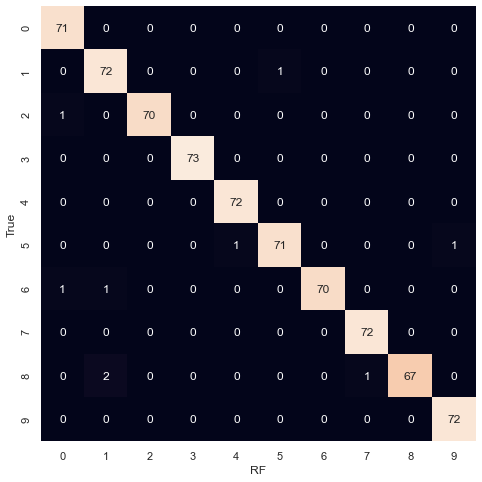

In [28]:
from scipy.stats import randint as sp_randint

rfParams = {"n_estimators" : [5, 10, 25, 50, 75, 100],
            "max_depth": [5, None], #3,4,5,6,7,8,None
            "max_features": sp_randint(1, 11),
            "min_samples_split": sp_randint(2, 11),
            "bootstrap": [True, False],
            "criterion": ["gini", "entropy"]}

rf = RandomizedSearchCV(RandomForestClassifier(), 
                        rfParams, cv = cv, n_iter = 100)

rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
print("Picked Parameters:", rf.best_estimator_.max_depth, rf.best_estimator_.max_features,
      rf.best_estimator_.min_samples_split, rf.best_estimator_.bootstrap, rf.best_estimator_.criterion,
      rf.best_estimator_.n_estimators)
print("Random Forest Train Accuracy:", rf.score(Xtrain,ytrain))
print("Random Forest Test Accuracy:", rf.score(Xtest, ytest))

mat = confusion_matrix(ytest, ypred)
plt.figure(figsize = (12, 8))
sns.heatmap(mat, square = True, annot = True, fmt = "d", cbar = False,
            xticklabels = digits["target_names"], yticklabels = digits["target_names"])
plt.xlabel("RF")
plt.ylabel("True")
plt.show()

Good performance but is the parameter search overkill since random forests are pretty robust

Picked Parameters v2: None auto 2 True gini 50
Random Forest Train Accuracy v2: 1.0
Random Forest Test Accuracy v2: 0.9735744089012517


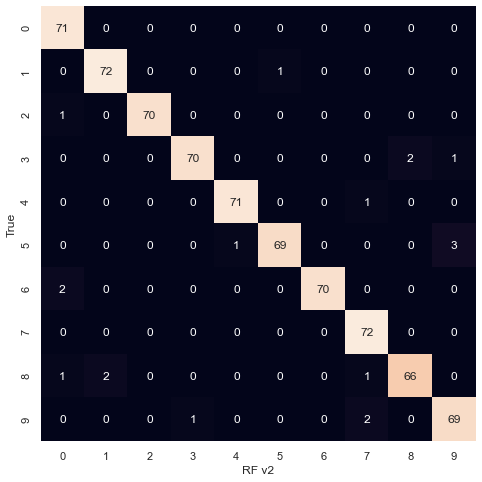

In [29]:
from scipy.stats import randint as sp_randint

rfParams = {"n_estimators": [5, 10, 25, 50, 75, 100],
            "max_depth": [3, 4, 5, 6, 7, 8, None]}

rf = GridSearchCV(RandomForestClassifier(), 
                        rfParams, cv = cv)
rf.fit(Xtrain,ytrain)
ypred = rf.predict(Xtest)
print("Picked Parameters v2:", rf.best_estimator_.max_depth, rf.best_estimator_.max_features,
      rf.best_estimator_.min_samples_split, rf.best_estimator_.bootstrap, rf.best_estimator_.criterion,
      rf.best_estimator_.n_estimators)
print("Random Forest Train Accuracy v2:", rf.score(Xtrain,ytrain))
print("Random Forest Test Accuracy v2:", rf.score(Xtest, ytest))
mat = confusion_matrix(ytest, ypred)
plt.figure(figsize = (12, 8))
sns.heatmap(mat, square = True, annot = True, fmt = "d", cbar = False,
            xticklabels = digits["target_names"], yticklabels = digits["target_names"])
plt.xlabel("RF v2")
plt.ylabel("True")
plt.show()

Random Forest Side Benefit: Feature Importances

Top 20 features:
1. feature 21 (0.054697)
2. feature 26 (0.044426)
3. feature 43 (0.043254)
4. feature 36 (0.041915)
5. feature 42 (0.039925)
6. feature 28 (0.033477)
7. feature 61 (0.032233)
8. feature 30 (0.030320)
9. feature 20 (0.029948)
10. feature 34 (0.029629)
11. feature 13 (0.029087)
12. feature 10 (0.028685)
13. feature 33 (0.027629)
14. feature 44 (0.025450)
15. feature 27 (0.025253)
16. feature 58 (0.024166)
17. feature 38 (0.023227)
18. feature 60 (0.023184)
19. feature 19 (0.022416)
20. feature 2 (0.022097)


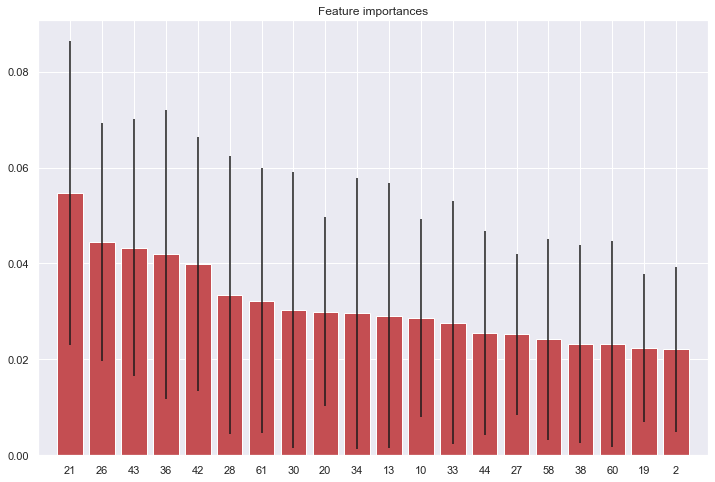

In [30]:
forest = rf.best_estimator_
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis = 0)
indices = np.argsort(importances)[::-1]

print("Top 20 features:")

for f in range(20):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Çizdirelim
plt.figure(figsize = (12, 8))
plt.title("Feature importances")
plt.bar(range(20), importances[indices[0:20]],
       color = "r", yerr = std[indices[0:20]], align = "center")
plt.xticks(range(20), indices[0:20])
plt.xlim([-1, 20])
plt.show()

What is feature 21 or feature 43?

In [31]:
# Another benefit:
# forest.predict_proba

**Exercise:** The breast-cancer (`load_breast_cancer`) dataset within `scikit-learn` is for a binary classficiation problem. Pick at least two classification algorithms, train them by also picking hyper-parameters and compare the results. Interpret everything as much as you can.

Note that the class distribution is not 50-50 for this dataset. 

Is accuracy the best score? Both due to imbalance and due to the importance of classes.

In [42]:
# Load the dataset:
bc_dataset = datasets.load_breast_cancer()
print(bc_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

As you can see, there 30 features. We would want to do an exploratory analysis before we dive, normally. This is left for after we cover pre-processing methods.

In [44]:
# Get the data
Xbc = bc_dataset['data']
ybc = bc_dataset['target']         

In [47]:
import pandas as pd

In [49]:
df = pd.DataFrame(Xbc, columns=bc_dataset["feature_names"])
df["target"] = ybc

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [52]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x11519489b08>,
 'caps': [<matplotlib.lines.Line2D at 0x11519486c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1151947af48>],
 'medians': [<matplotlib.lines.Line2D at 0x1151a2fa9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1151a2fabc8>],
 'means': []}

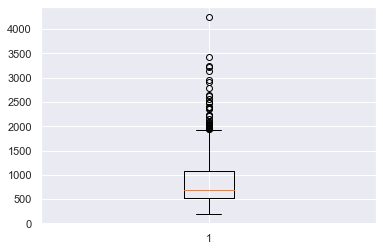

In [60]:
plt.boxplot(df.iloc[:,-8])

<AxesSubplot:>

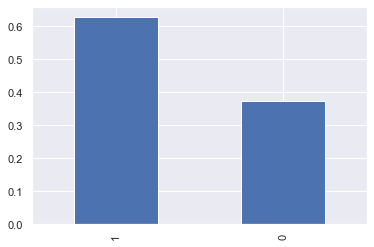

In [67]:
(df["target"].value_counts()/df.shape[0]).plot(kind="bar")

In [ ]:
# skipping preprocessing steps for now

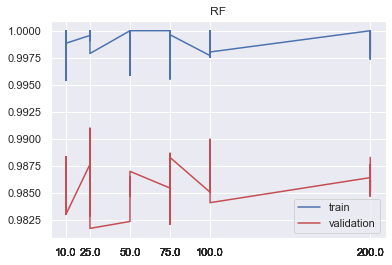

In [72]:
# Split!
Xtrain, Xtest, ytrain, ytest = train_test_split(Xbc, ybc, 
                                                test_size = 0.2, 
                                                stratify = ybc)

# Random Forest

# Hyperparameter search space
rf_params = {"n_estimators":[10, 25, 50, 75, 100, 200],
             "max_depth": [3, 5, 8, None],
             "max_features": sp_randint(1,13)}


# CV type
cv = StratifiedKFold(n_splits=5, shuffle = True)

# Search Algorithm and Metric
rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                        param_distributions = rf_params,
                        n_iter = 50,
                        cv = cv,
                        scoring="roc_auc",
                        return_train_score=True)

# Fitting
rf.fit(Xtrain, ytrain)
plotTrainValScore(rf, "n_estimators", "RF", rf.n_iter)

In [73]:
print("Picked Parameters:", rf.best_estimator_.n_estimators, rf.best_estimator_.max_depth, rf.best_estimator_.max_features)
print("Random Forest Train Accuracy:", rf.score(Xtrain,ytrain))
print("Random Forest Test Accuracy:", rf.score(Xtest, ytest))

Picked Parameters: 25 5 1
Random Forest Train Accuracy: 0.9984726522187823
Random Forest Test Accuracy: 0.9771825396825398


In [76]:
rf.best_estimator_.estimators_[0].tree_.

Top 26 features:
1. feature 6 (0.091957)
2. feature 26 (0.073015)
3. feature 23 (0.062635)
4. feature 22 (0.056098)
5. feature 12 (0.050985)
6. feature 5 (0.050196)
7. feature 10 (0.049143)
8. feature 27 (0.047528)
9. feature 7 (0.046026)
10. feature 2 (0.038283)
11. feature 13 (0.035285)
12. feature 1 (0.034948)
13. feature 24 (0.034343)
14. feature 20 (0.033751)
15. feature 3 (0.032664)
16. feature 16 (0.029643)
17. feature 21 (0.025357)
18. feature 4 (0.025282)
19. feature 0 (0.024535)
20. feature 29 (0.019926)
21. feature 15 (0.019335)
22. feature 14 (0.019223)
23. feature 8 (0.017506)
24. feature 9 (0.016666)
25. feature 28 (0.016329)
26. feature 25 (0.013240)


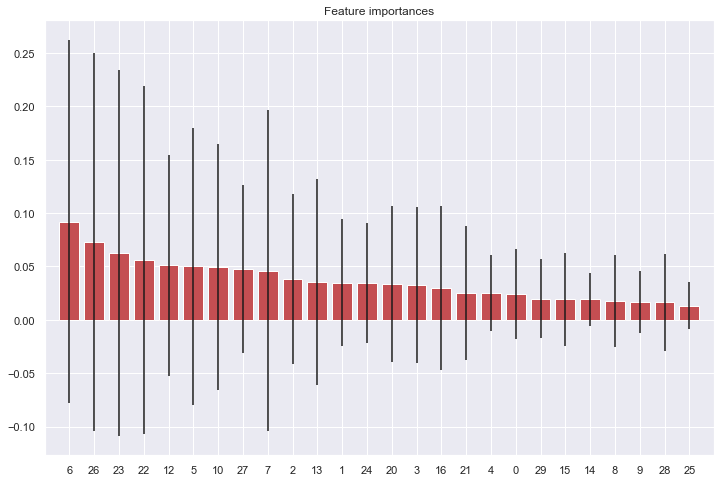

In [80]:
forest = rf.best_estimator_
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis = 0)
indices = np.argsort(importances)[::-1]

print("Top 26 features:")

for f in range(26):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Çizdirelim
plt.figure(figsize = (12, 8))
plt.title("Feature importances")
plt.bar(range(26), importances[indices[0:26]],
       color = "r", yerr = std[indices[0:26]], align = "center")
plt.xticks(range(26), indices[0:26])
plt.xlim([-1, 26])
plt.show()

In [81]:
tmp = [tree.feature_importances_ for tree in forest.estimators_]

In [82]:
tmp

[array([0.        , 0.01305034, 0.03171958, 0.        , 0.10524999,
        0.        , 0.14760944, 0.        , 0.00507513, 0.0888494 ,
        0.2319797 , 0.        , 0.        , 0.02794872, 0.        ,
        0.        , 0.        , 0.09683446, 0.01013954, 0.        ,
        0.        , 0.18484145, 0.        , 0.        , 0.        ,
        0.05566649, 0.        , 0.        , 0.00103574, 0.        ]),
 array([0.        , 0.        , 0.        , 0.05150106, 0.        ,
        0.        , 0.25758713, 0.03784192, 0.01194144, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09780046,
        0.00257838, 0.18895089, 0.01264754, 0.015498  , 0.1170971 ,
        0.02801562, 0.05233049, 0.        , 0.        , 0.        ,
        0.        , 0.00238431, 0.1161005 , 0.        , 0.00772516]),
 array([3.60476288e-02, 2.60072715e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.31236448e-02, 4.57904162e-04, 1.08116494e-02,
        1.42318249e-02, 2.17227519e-

In [83]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra